In [1]:
import pandas as pd
import numpy as np
import numpy.typing as npt
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [5]:
# setting constants
PROJECT_ROOT = os.path.split(os.getcwd())[0]
DATA_RAW = 'data'
DATA_PRO = 'data/processed'

# names of datasets
QC23_raw = 'QC23_Dataset'
QC23_clean = 'cleaned_QC23_Dataset'
QC23_prob = 'qc23_prob'
QC23_prob_pro = 'qc23_prob_pro'
QC23_log = 'qc23_log'
QC23_log_pro = 'qc23_log_pro'
PROB_RESP_COUNT = 'problem_response_counts'
STUD_RESP_COUNT = 'student_response_counts'
PROB_ASSIST_MAP = 'problem_assistment_mapping'

# names of file types
CSV = '.csv'
JSON = '.json'

# names of columns
PROBLEM_LOG_ID = 'problem_log_id'
STUDENT_USER_ID = 'student_user_id'
ASSIGNMENT_ID = 'assignment_id'
ASSISTMENT_ID = 'assistment_id'
ASSIGNMENT_COMPLETION = 'assignment_completion'
PROBLEM_ID = 'problem_id'
SKILL_CODE = 'skill_code'
SKILL_NAME = 'skill_name'
SKILL_BUILDER = 'is_flat_skill_builder'
SCAFFOLD = 'is_scaffold'
PROBLEM_START_TIME = 'problem_start_time'
PROBLEM_END_TIME = 'problem_end_time'
PROBLEM_TYPE_ID = 'problem_type_id'
PROBLEM_TYPE = 'problem_type'
PROBLEM_ORDER = 'problem_order'
PROBLEM_BODY = 'problem_body'
ANSWER_TEXT = 'answer_text'
CORRECTNESS = 'correctness'

# Dtypes:
EXPECTED_DTYPES = {'problem_log_id': 'int64',
        'student_user_id': 'int64',
        'prior_problems_count': 'int64',
        'prior_pr10_avg_correctness': 'float64',
        'prior_5pr_avg_correctness': 'float64',
        'prior_pr_avg_correctness': 'float64',
        'problem_set_id': 'int64',
        'student_class_id': 'int64',
        'teacher_id': 'int64',
        'assignment_id': 'int64',
        'assignment_start_time': 'object',
        'assignment_end_time': 'object',
        'assignment_completion': 'int64',
        'assistment_id': 'int64',
        'problem_id': 'int64',
        'problem_set_name': 'object',
        'content_source': 'object',
        'is_flat_skill_builder': 'int64',
        'is_scaffold': 'int64',
        'problem_type_id': 'int64',
        'skill_code': 'object',
        'skill_name': 'object',
        'problem_type': 'object',
        'problem_body': 'object',
        'problem_order': 'int64',
        'problem_start_time': 'object',
        'problem_end_time': 'object',
        'answer_text': 'object',
        'correctness': 'float64',
        'hint_count': 'int64',
        'bottom_hint': 'bool',
        'first_action_is_attempt': 'float64'
        }


In [ ]:
# Import the list of ground truth problem_id
problem_pro = pd.read_csv(os.path.join(PROJECT_ROOT, DATA_PRO, QC23_prob_pro + CSV))
problem_id = problem_pro[PROBLEM_ID].to_numpy()

## Interaction Analysis

In [4]:
inter_df = pd.read_csv(os.path.join(PROJECT_ROOT, DATA_PRO, QC23_log + CSV))

print("Total number of interactions: %d" % len(inter_df))

outbound_correctness = {}
for k, v in inter_df.correctness.value_counts().to_dict().items():
    if k < 0 or k > 1:
        outbound_correctness[k] = v
print(outbound_correctness)
# there are bunch of correctness outside 0-1 range, we drop them

Total number of interactions: 16419584
{1.25: 549, 11.0: 207, 1.5: 69, 2.0: 67, 1.125: 63, 1.75: 35, 2.25: 32, 2.75: 30, 10.0: 17, 5.5: 16, 8.25: 14, 3.5: 14, 10.75: 13, 3.0: 13, 2.5: 12, 8.5: 12, 6.0: 12, 10.5: 9, 25.0: 9, 5.75: 6, 1.1: 6, 111.0: 5, 10.25: 5, 5.0: 4, 8.0: 4, 12.5: 4, 7.75: 4, 3.25: 4, 102.5: 2, -1.0: 2, 7.5: 2, 1.05: 2, 12.25: 2, 82.5: 1, 111111111.0: 1, 1032.25: 1, 35.25: 1, 1025.0: 1, 1058.5: 1, 8.375: 1, 50.0: 1, 6.5: 1, 8.75: 1, 250.0: 1, 11.75: 1, 18.75: 1, 3.75: 1, 5.25: 1, 3.125: 1, 1.111111111111111e+19: 1, 126.0: 1}


In [5]:
inter_df = inter_df[(inter_df.correctness >= 0) & (inter_df.correctness <= 1)]

print("Total number of interactions after dropping outbounded ones: %d" % len(inter_df))
# check the correctness values
inter_df.correctness.value_counts().index.to_numpy()

Total number of interactions after dropping outbounded ones: 16418321


array([1.        , 0.        , 0.66666667, 0.33333333, 0.5       ,
       0.75      , 0.25      , 0.875     , 0.625     , 0.7       ,
       0.9375    , 0.375     , 0.95      , 0.6875    , 0.675     ,
       0.975     , 0.6       , 0.9       , 0.67      , 0.125     ,
       0.8       , 0.8125    , 0.65      , 0.33      , 0.3325    ,
       0.925     , 0.55      , 0.335     , 0.4375    , 0.9875    ,
       0.325     , 0.85      , 0.51      , 0.725     , 0.9625    ,
       0.6675    , 0.5625    , 0.84      , 0.4       , 0.8675    ,
       0.7125    , 0.99      , 0.9175    , 0.075     , 0.825     ,
       0.835     , 0.665     , 0.9325    , 0.025     , 0.74      ,
       0.05      , 0.1675    , 0.8325    , 0.575     , 0.92      ,
       0.495     , 0.2475    , 0.53      , 0.7525    , 0.885     ,
       0.45      , 0.96875   , 0.525     , 0.0625    , 0.3425    ,
       0.6575    , 0.7075    , 0.2       , 0.8575    , 0.89      ,
       0.44      ])

In [6]:
inter_df.correctness.value_counts()

correctness
1.000000    10755577
0.000000     3951082
0.666667      908852
0.333333      251507
0.500000      226606
              ...   
0.707500           1
0.200000           1
0.857500           1
0.890000           1
0.440000           1
Name: count, Length: 71, dtype: int64

In [20]:
# problem_log time span analysis
# inter_df[[PROBLEM_START_TIME, PROBLEM_END_TIME]].apply(pd.to_datetime)

/tmp/ipykernel_5913/3504742113.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  inter_df[[PROBLEM_START_TIME, PROBLEM_END_TIME]].apply(pd.to_datetime)
/tmp/ipykernel_5913/3504742113.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  inter_df[[PROBLEM_START_TIME, PROBLEM_END_TIME]].apply(pd.to_datetime)


,problem_start_time,problem_end_time
0,2018-12-20 12:04:39.823000-05:00,2018-12-20 12:05:17.018000-05:00
1,2018-12-20 12:04:46.001000-05:00,2018-12-20 12:05:37.277000-05:00
2,2018-12-20 12:04:46.038000-05:00,2018-12-20 12:05:09.637000-05:00
3,2018-12-20 12:04:48.268000-05:00,2018-12-20 12:04:52.403000-05:00
4,2018-12-20 12:04:51.297000-05:00,2018-12-20 12:05:44.658000-05:00
...,...,...
16419579,2023-01-27 11:09:55.336000-05:00,2023-01-27 11:10:04.175000-05:00
16419580,2023-01-27 11:10:32.210000-05:00,2023-01-27 11:12:00.779000-05:00
16419581,2023-01-27 11:13:36.711000-05:00,2023-01-27 11:14:05.519000-05:00
16419582,2023-01-27 11:15:33.330000-05:00,2023-01-27 11:23:10.712000-05:00


In [7]:
response_df = inter_df[[PROBLEM_LOG_ID, STUDENT_USER_ID, PROBLEM_ID, CORRECTNESS]]

In [8]:
# Only keep the problems that are in the processed problem prompt table
response_df = response_df[response_df.problem_id.isin(problem_id)].reset_index(drop=True)

In [9]:
response_df.problem_id.nunique()

38570

In [10]:
response_df.student_user_id.nunique()

440477

In [15]:
len(response_df)

16247775

In [12]:
# identify if there are any duplicated interactions
response_df[[STUDENT_USER_ID, PROBLEM_ID]].duplicated(keep=False).any()

False

In [35]:
response_mat = response_df.pivot(index=STUDENT_USER_ID, columns=PROBLEM_ID, values=CORRECTNESS)

/tmp/ipykernel_4996/1471296213.py:1: PerformanceWarning: The following operation may generate 16989197890 cells in the resulting pandas object.
  response_mat = response_df.pivot(index=STUDENT_USER_ID, columns=PROBLEM_ID, values=CORRECTNESS)


: 

In [73]:
response_df

,problem_log_id,student_user_id,problem_id,correctness
0,15444,523,1601582,1.00
1,15445,566,1601584,1.00
2,15446,505,1601582,1.00
3,15447,509,1601582,1.00
4,15449,550,1601584,1.00
...,...,...,...,...
16247770,168055847,373731,1393682,0.00
16247771,168055931,1972597,1573432,0.00
16247772,168056348,1109614,1066412,1.00
16247773,168056567,1113851,1331998,0.25


In [14]:
response_df.to_csv(os.path.join(PROJECT_ROOT, DATA_PRO, 'qc23_log_pro.csv'), index=False)

## Response Count

In [44]:
problem_response_count = response_df.groupby(PROBLEM_ID).student_user_id.count().reset_index().rename(columns={
    'student_user_id': 'response_count'
})
student_response_count = response_df.groupby(STUDENT_USER_ID).problem_id.count().reset_index().rename(columns={
    'problem_id': 'response_count'
})

In [36]:
problem_response_count['response_count'].describe()

count    38570.000000
mean       421.254213
std        797.306662
min          1.000000
25%         22.000000
50%         97.000000
75%        436.000000
max      19634.000000
Name: response_count, dtype: float64

In [45]:
student_response_count['response_count'].describe()

count    440477.000000
mean         36.886773
std          68.439848
min           1.000000
25%           4.000000
50%          13.000000
75%          38.000000
max        1921.000000
Name: response_count, dtype: float64

In [65]:
student_response_count.student_user_id.count()

440477

In [66]:
def response_count_func(df: pd.DataFrame, col: str) -> pd.DataFrame:
    # counts number of problems that have response_count = 1
    ans_1 = len(df[df[col] == 1])
    # counts number of problems that have response_count between 2-10
    ans_10 = len(df[(df[col] >= 2) & (df[col] < 10)])
    # counts number of problems that have response_count between 10-50
    ans_50 = len(df[(df[col] >= 10) & (df[col] < 50)])
    # counts number of problems that have response_count between 50-100
    ans_100 = len(df[(df[col] >= 50) & (df[col] < 100)])
    # counts number of problems that have response_count between 100-200
    ans_200 = len(df[(df[col] >= 100) & (df[col] < 200)])
    # counts number of problems that have response_count between 200-500
    ans_500 = len(df[(df[col] >= 200) & (df[col] < 500)])
    # counts number of problems that have response_count between 500-1000
    ans_1000 = len(df[(df[col] >= 500) & (df[col] < 1000)])
    # counts number of problems that have response_count more than 1000
    ans_1000_plus = len(df[df[col] >= 1000])

    ans_count = pd.Series([ans_1, ans_10, ans_50, ans_100, ans_200, ans_500, ans_1000, ans_1000_plus], index=['1', '2-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000+'])
    return pd.DataFrame({'count': ans_count.values, 'range': ans_count.index}) 
    

In [67]:
problem_count_bin =  response_count_func(problem_response_count, 'response_count')
sutdent_count_bin = response_count_func(student_response_count, 'response_count')

In [68]:
sutdent_count_bin['count'].sum()

440477

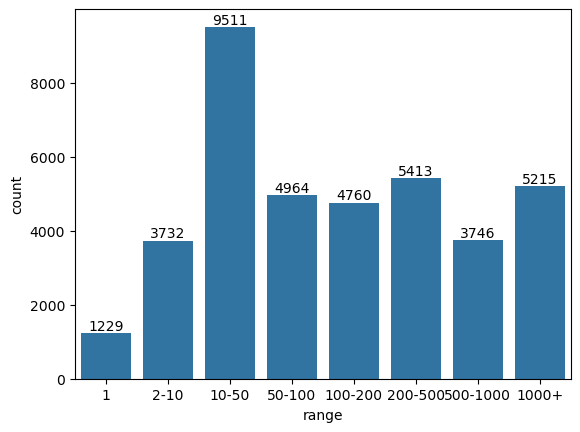

In [69]:
sns.barplot(data=problem_count_bin, x='range', y='count')
# label each bar with the count
for index, row in problem_count_bin.iterrows():
    plt.text(row['range'], row['count'], row['count'], ha='center', va='bottom')
plt.show()

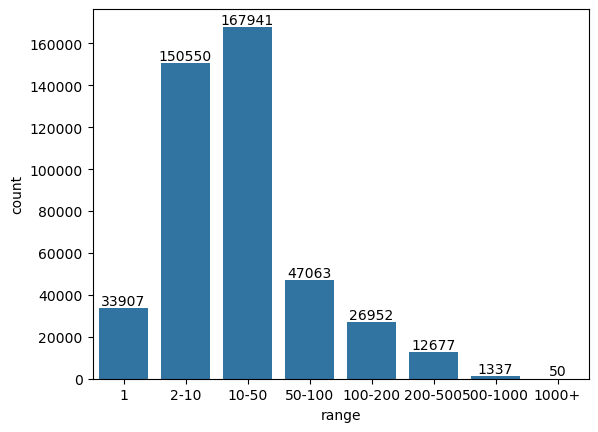

In [70]:
sns.barplot(data=sutdent_count_bin, x='range', y='count')
# label each bar with the count
for index, row in sutdent_count_bin.iterrows():
    plt.text(row['range'], row['count'], row['count'], ha='center', va='bottom')
plt.show()

In [ ]:
# Import the list of ground truth problem_id
problem_pro = pd.read_csv(os.path.join(PROJECT_ROOT, DATA_PRO, QC23_prob_pro + CSV))
problem_id = problem_pro[PROBLEM_ID].to_numpy()

In [ ]:
problem_response_count.to_csv(os.path.join(PROJECT_ROOT, DATA_PRO, PROB_RESP_COUNT + CSV), index=False)